# Quantum information and quantum computing - Problem set 10

### _Problem 2_ : Noise channels in Qiskit

In this exercise we will learn how to implement a noise channel in Qiskit.

In [4]:
# First, import all the useful methods

import numpy as np
import matplotlib.pyplot as plt   
import math


from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.quantum_info import DensityMatrix


## Noise model
from qiskit_aer import QasmSimulator
import qiskit_aer.noise as noise


## To visualize density matrices
from qiskit.visualization import plot_state_city

----

#### Evaluate density matrices

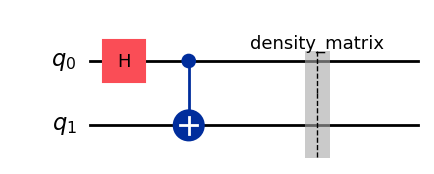

In [5]:
## Initialise the circuit in the bell state
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0,1)
circ.save_density_matrix()

circ.draw("mpl")

In [6]:
simulator = QasmSimulator(method='density_matrix')

In [9]:
# Perform a noise simulation
result = simulator.run(circ).result()

In [10]:
rho = result.data()["density_matrix"]
rho.draw('latex', prefix='\\rho = ')

<IPython.core.display.Latex object>

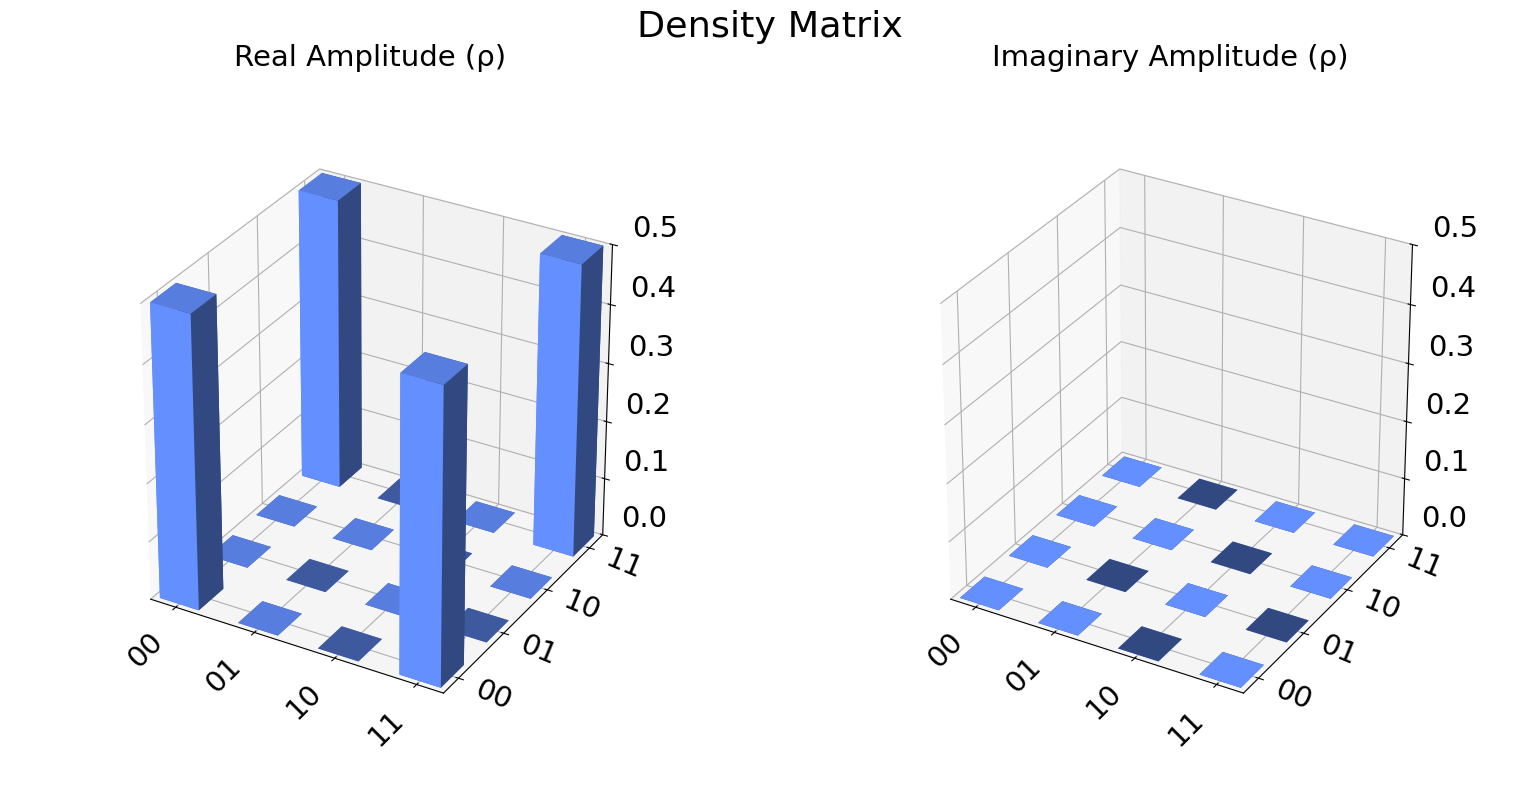

In [11]:
plot_state_city(rho.data, title='Density Matrix')

In [12]:
print("Purity:",rho.purity().real)

Purity: 1.0


----
#### Create Noise Model

In [13]:
noise_model = noise.NoiseModel()

In [14]:
# Error probabilities
prob_1 = 0.001  # 1-qubit gate
prob_2 = 0.5   # 2-qubit gate

# Depolarizing quantum errors
error_1 = noise.depolarizing_error(prob_1, 1)
error_2 = noise.depolarizing_error(prob_2, 2)

In [15]:
# Add errors to noise model
noise_model.add_all_qubit_quantum_error(error_1, ['u1', 'u2', 'u3'])
noise_model.add_all_qubit_quantum_error(error_2, ['cx'])

In [16]:
noise_circ = QuantumCircuit(2)
noise_circ.h(0)
noise_circ.cx(0,1)
noise_circ.save_density_matrix()

In [17]:
noise_simulator = QasmSimulator(method='density_matrix',
                        noise_model=noise_model)

In [19]:
# Perform a noise simulation
result = noise_simulator.run(noise_circ).result()

In [20]:
noise_rho = result.data()["density_matrix"]
noise_rho.draw('latex', prefix='\\rho_{noise} = ')

<IPython.core.display.Latex object>

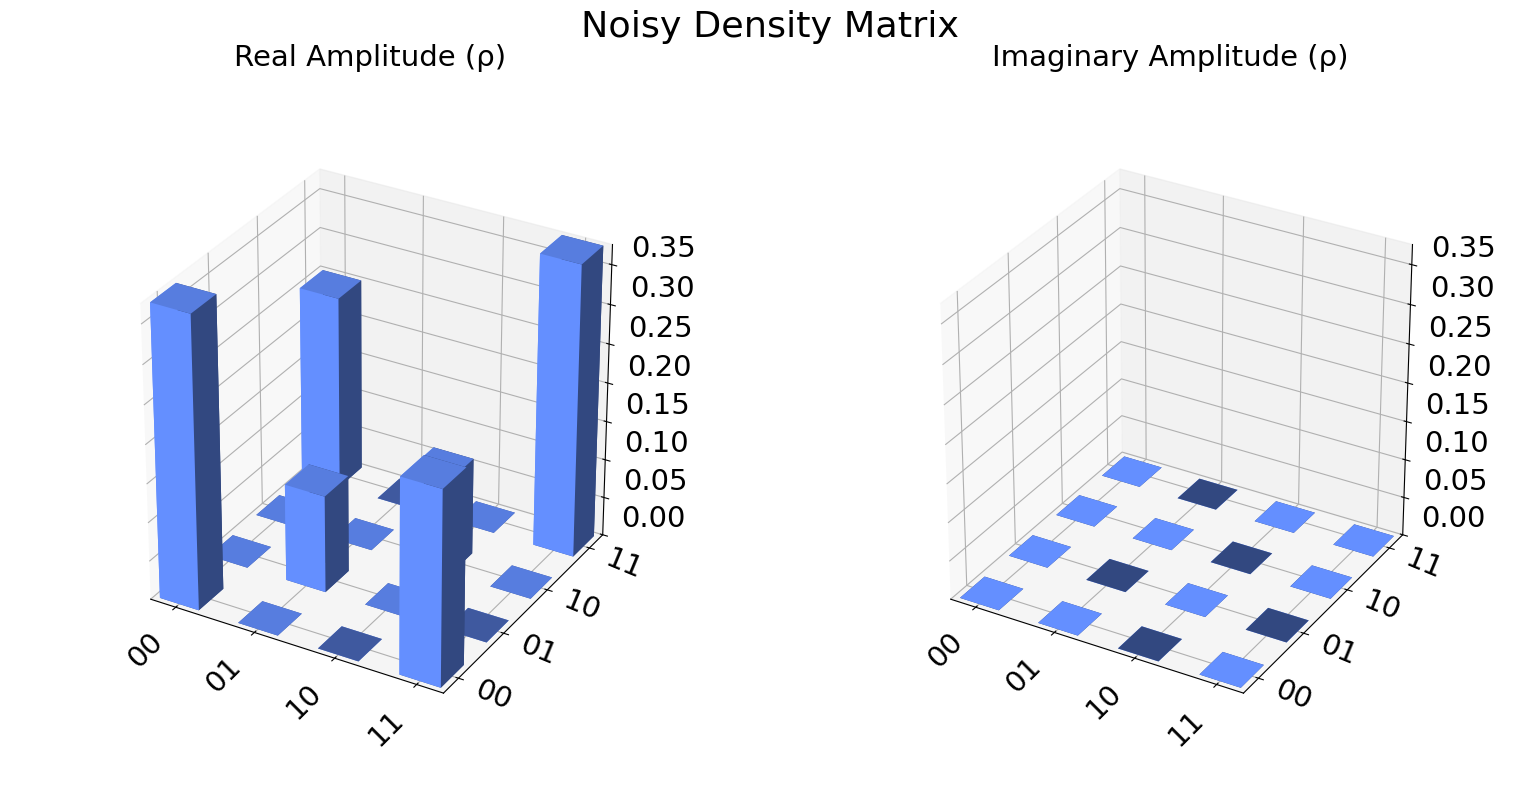

In [21]:
plot_state_city(noise_rho.data, title='Noisy Density Matrix')

In [22]:
print("Purity:",noise_rho.purity().real)

Purity: 0.4375


----

#### Evaluate density matrices with Quantum Tomography

In [26]:
#!pip install qiskit_experiments

In [27]:
from qiskit_experiments.library import StateTomography
from qiskit_experiments.library.tomography import StateTomographyAnalysis

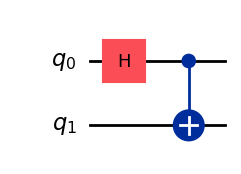

In [28]:
exp_circ = QuantumCircuit(2)
exp_circ.h(0)
exp_circ.cx(0,1)

exp_circ.draw("mpl")

In [29]:
tomography = StateTomography(exp_circ)

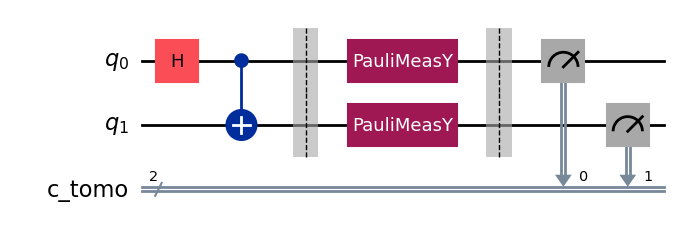

In [30]:
tomography.circuits()[8].draw("mpl")

In [33]:
exp = tomography.run(noise_simulator,shots=5000)

/Users/clemensgiuliani/epfl/teaching/qc24/venv_qiskit/lib/python3.12/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:234: UserWarning: Options {'execution': {'meas_type': 'classified'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


In [34]:
exp_analysis = exp.analysis_results()[0]

In [35]:
tomo_rho = exp_analysis.value
tomo_rho.draw('latex', prefix='\\rho_{tomo} = ')

<IPython.core.display.Latex object>

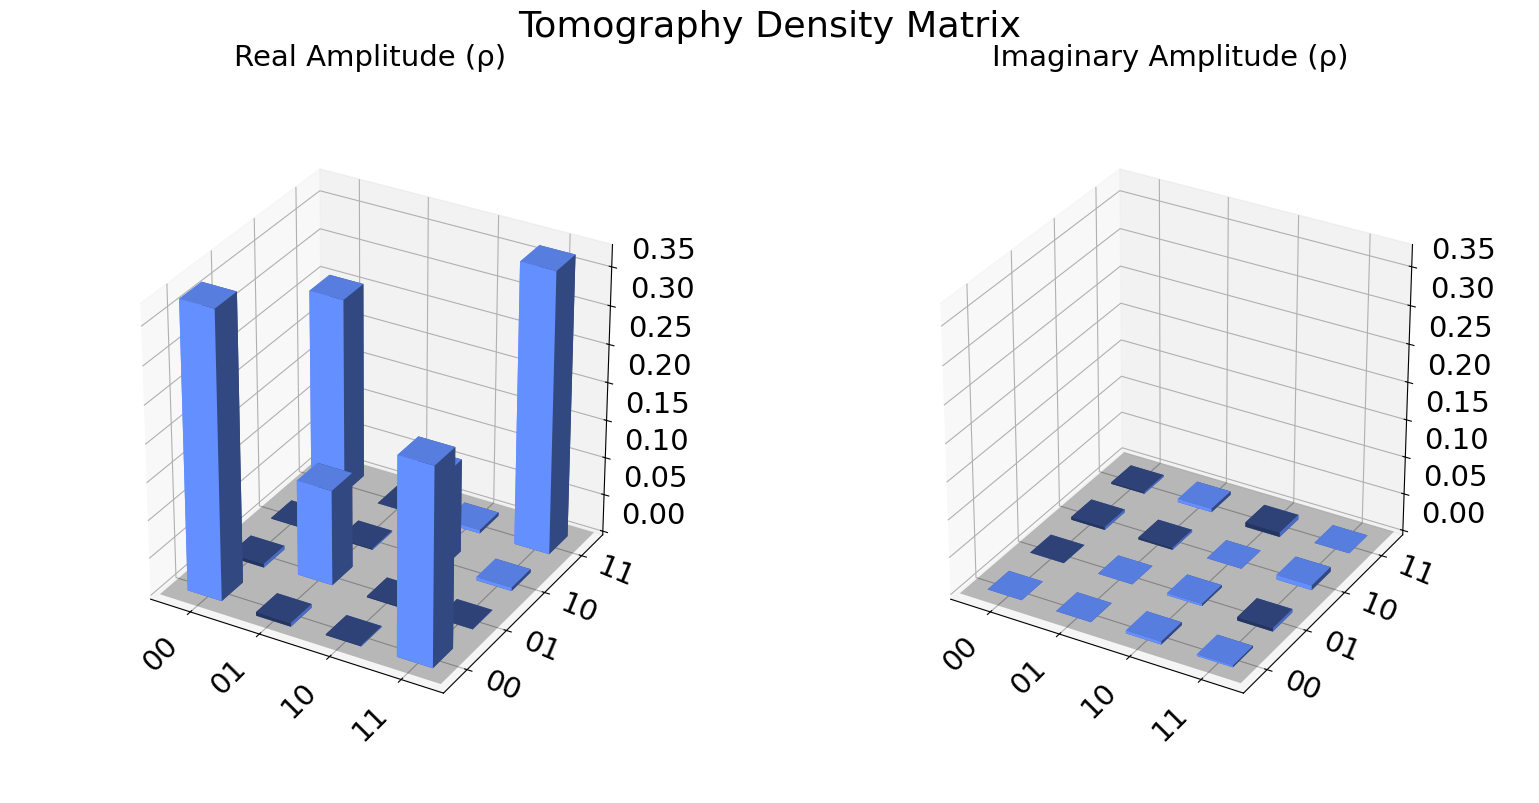

In [36]:
plot_state_city(tomo_rho.data, title='Tomography Density Matrix')

In [37]:
print("Purity:",tomo_rho.purity().real)

Purity: 0.44883841777777855
